In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# Carga de datos

**Cargamos** la tabla completa de datos

In [2]:
# Se carga el dataset
hoteles = pd.read_csv("hoteles-entrena.csv")
hoteles['arrival_date'] = pd.to_datetime(hoteles['arrival_date'])
hoteles['arrival_month'] = hoteles['arrival_date'].dt.month_name()
hoteles['arrival_day'] = hoteles['arrival_date'].dt.day_name()

#Se tira columna con demasiados valores nulos
#hoteles.drop(columns='company', inplace=True)

#Encoding de variable children
#    0: none
#    1: children
#hoteles['children'].replace(to_replace=['none','children'], value=[0,1], inplace=True)

#Se replazan valores nulos 
hoteles.fillna(value=-1, inplace=True)

hoteles.head()

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,arrival_date,arrival_month,arrival_day
0,Resort_Hotel,342,0,0,2,none,BB,PRT,Direct,Direct,0,0,0,C,C,3,No_Deposit,-1.0,-1.0,0,Transient,0.0,none,0,2015-07-01,July,Wednesday
1,Resort_Hotel,737,0,0,2,none,BB,PRT,Direct,Direct,0,0,0,C,C,4,No_Deposit,-1.0,-1.0,0,Transient,0.0,none,0,2015-07-01,July,Wednesday
2,Resort_Hotel,7,0,1,1,none,BB,GBR,Direct,Direct,0,0,0,A,C,0,No_Deposit,-1.0,-1.0,0,Transient,75.0,none,0,2015-07-01,July,Wednesday
3,Resort_Hotel,13,0,1,1,none,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No_Deposit,304.0,-1.0,0,Transient,75.0,none,0,2015-07-01,July,Wednesday
4,Resort_Hotel,14,0,2,2,none,BB,GBR,Online_TA,TA/TO,0,0,0,A,A,0,No_Deposit,240.0,-1.0,0,Transient,98.0,none,1,2015-07-01,July,Wednesday


**Información** del conjunto de datos

In [3]:
hoteles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61969 entries, 0 to 61968
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           61969 non-null  object        
 1   lead_time                       61969 non-null  int64         
 2   stays_in_weekend_nights         61969 non-null  int64         
 3   stays_in_week_nights            61969 non-null  int64         
 4   adults                          61969 non-null  int64         
 5   children                        61969 non-null  object        
 6   meal                            61969 non-null  object        
 7   country                         61969 non-null  object        
 8   market_segment                  61969 non-null  object        
 9   distribution_channel            61969 non-null  object        
 10  is_repeated_guest               61969 non-null  int64         
 11  pr

**Buscamos** predecir para una reservación si se van a tener niños o no

In [4]:
#Categorías de salida
hoteles['children'].unique()

array(['none', 'children'], dtype=object)

In [5]:
#Balanceo de variable respuesta
hoteles['children'].value_counts(normalize=True)

none        0.925366
children    0.074634
Name: children, dtype: float64

**Observaciones**
* El $92.5\%$ de las reservaciones no tienen hijos.
* El $7.5\%$ de las reservaciones tienen hijos.
* La base está fuertemente desbalanceada para la variable respuesta.
* Posiblemente sea requerido un criterio de balanceo de bases.

# Análisis Exploratorio e Ingeniería de Entradas

**Primero** empezamos con las variables que no sean numéricas

In [6]:
cat_vars = hoteles.dtypes[hoteles.dtypes == 'object'].keys()
for var in cat_vars:
    print(f"{var}:")
    print(f"\tCats: {len(hoteles[var].unique())}")
    print(20*'-')

hotel:
	Cats: 2
--------------------
children:
	Cats: 2
--------------------
meal:
	Cats: 5
--------------------
country:
	Cats: 156
--------------------
market_segment:
	Cats: 7
--------------------
distribution_channel:
	Cats: 5
--------------------
reserved_room_type:
	Cats: 9
--------------------
assigned_room_type:
	Cats: 10
--------------------
deposit_type:
	Cats: 3
--------------------
customer_type:
	Cats: 4
--------------------
required_car_parking_spaces:
	Cats: 2
--------------------
arrival_month:
	Cats: 12
--------------------
arrival_day:
	Cats: 7
--------------------


**Descartamos** las variables `country` y `arrival_date` de la lista de variables categóricas para efectos de visualización

In [7]:
cat_panel = cat_vars.to_list()
cat_panel.remove('country')

for var in cat_panel:
    print(f"{var}:")
    print(f"\tCats: {hoteles[var].unique()}")
    print(20*'-')

hotel:
	Cats: ['Resort_Hotel' 'City_Hotel']
--------------------
children:
	Cats: ['none' 'children']
--------------------
meal:
	Cats: ['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------
market_segment:
	Cats: ['Direct' 'Corporate' 'Online_TA' 'Offline_TA/TO' 'Complementary' 'Groups'
 'Aviation']
--------------------
distribution_channel:
	Cats: ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
--------------------
reserved_room_type:
	Cats: ['C' 'A' 'D' 'G' 'E' 'F' 'H' 'L' 'B']
--------------------
assigned_room_type:
	Cats: ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'K']
--------------------
deposit_type:
	Cats: ['No_Deposit' 'Refundable' 'Non_Refund']
--------------------
customer_type:
	Cats: ['Transient' 'Contract' 'Transient-Party' 'Group']
--------------------
required_car_parking_spaces:
	Cats: ['none' 'parking']
--------------------
arrival_month:
	Cats: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------

**Graficamos** variables categóricas

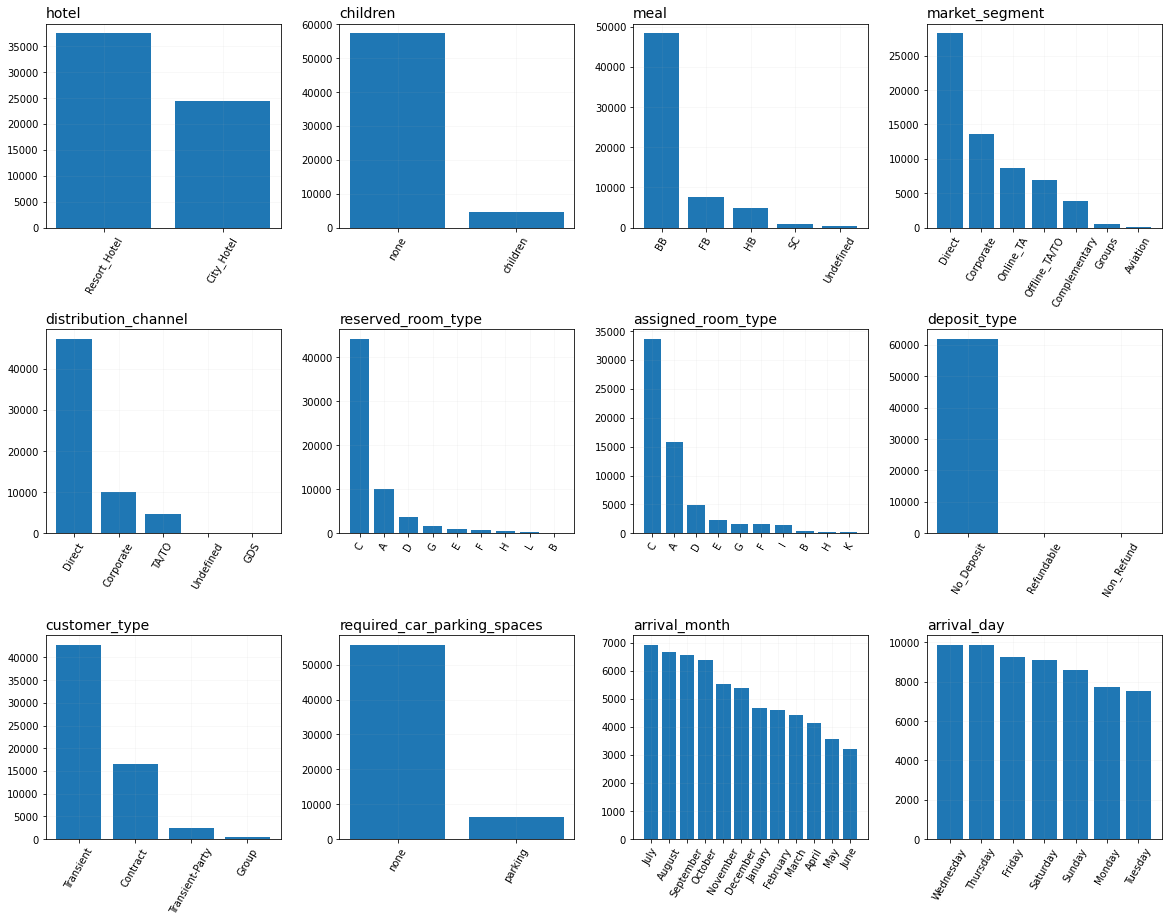

In [8]:
fig = plt.figure(figsize=(20,15))
spec = plt.GridSpec(ncols=4, nrows=3, wspace=0.25, hspace=0.5)

#Páneles
for i in range(len(cat_panel)):
    #Especificaciones de figura
    ax = fig.add_subplot(spec[i])
    
    #Contenido de figura
    ax.bar(x=hoteles[cat_panel[i]].unique(), height=hoteles[cat_panel[i]].value_counts())
    
    #Anotaciones y estilo
    ax.set_title(f"{cat_panel[i]}", fontsize=14, loc='left')
    ax.tick_params(axis='x', labelrotation=60)
    ax.grid(alpha=0.1)
    # ax.legend()

plt.show()

## Agent

In [9]:
#Función para obtener el ordenamiento de los cuantiles
def cuantiles_df(df, column):
    ordenamiento = pd.DataFrame(df.sort_values(by=column)[column])
    ordenamiento.reset_index(drop=True, inplace=True)
    ordenamiento['orden'] = pd.Series(np.arange(1,ordenamiento.shape[0]+1))
    ordenamiento['f'] = (ordenamiento['orden'] - 0.5)/len(ordenamiento)    
    
    return ordenamiento

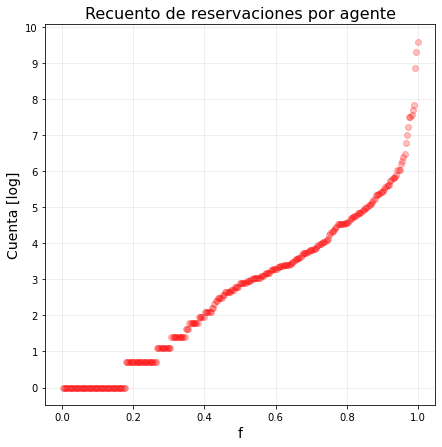

In [10]:
#Se obtiene el recuento de reservaciones por country
books_by_agent = hoteles.groupby(by='agent').count()[['hotel']]
cuantiles = cuantiles_df(books_by_agent, 'hotel')

#Tamaño de la figura
plt.figure(figsize=(7,7))

#Graficando para X1
plt.scatter(x=cuantiles['f'], y=np.log(cuantiles['hotel']), c='red', alpha=0.25)

#Styling
plt.title('Recuento de reservaciones por agente', fontsize=16)
plt.xlabel('f', fontsize=14)
plt.ylabel('Cuenta [log]', fontsize=14)
plt.yticks(ticks=np.arange(11))
plt.grid(alpha=0.25)

Definiendo $ln(7)$ como punto de corte

In [11]:
#Se obtienen los registros por debajo del punto de corte.
mask = books_by_agent.loc[books_by_agent['hotel'] <= np.e**7].index.to_list()

print("Cuenta de children en agentes debajo del punto de corte:")
print(hoteles.loc[hoteles['agent'].isin(mask)]['children'].value_counts(),'\n')

Cuenta de children en agentes debajo del punto de corte:
none        16118
children      656
Name: children, dtype: int64 



Reemplazamos etiquetas, recordando:
* $-1$: Referente a reservaciones que no se hicieron con agente.
* $0$: Referente a reservaciones que se hicieron con un agente y que están debajo del punto de corte.

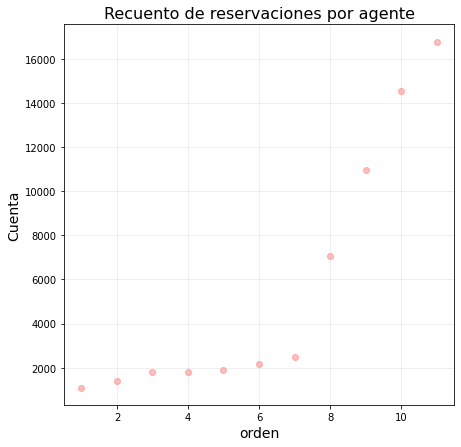

In [12]:
#Reemplazar etiquetas
hoteles.loc[hoteles['agent'].isin(mask), 'agent'] = 0

#Se obtiene el recuento de reservaciones por country
books_by_agent = hoteles.groupby(by='agent').count()[['hotel']]
cuantiles = cuantiles_df(books_by_agent, 'hotel')

#Tamaño de la figura
plt.figure(figsize=(7,7))

#Graficando para X1
plt.scatter(x=cuantiles['orden'], y=cuantiles['hotel'], c='red', alpha=0.25)

#Styling
plt.title('Recuento de reservaciones por agente', fontsize=16)
plt.xlabel('orden', fontsize=14)
plt.ylabel('Cuenta', fontsize=14)
plt.grid(alpha=0.25)

Se verifican las nuevas etiquetas en `agent`

In [13]:
np.sort(hoteles['agent'].unique())

array([ -1.,   0.,   1.,   6.,   7.,   9.,  14.,  28., 240., 241., 250.])

Recuento de reservaciones con niños agrupado por agente

In [14]:
crosstab = hoteles[['children','agent']].pivot_table(index='agent', columns='children', aggfunc=lambda x: len(x))
crosstab

children,children,none
agent,,
-1.0,593,10347
0.0,656,16118
1.0,13,1898
6.0,40,1775
7.0,245,2231
9.0,1481,13071
14.0,325,1841
28.0,71,1312
240.0,748,6297


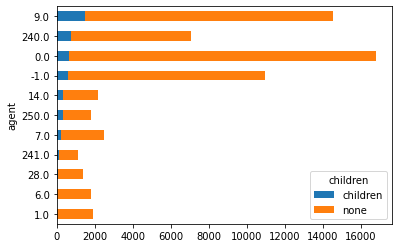

In [15]:
ax = crosstab.sort_values(by='children').plot.barh(rot=0, stacked=True)

Adicionalmente se observa que los agentes `[1, 6, 28, 241]` no contribuyen significativamente a la proporción de reservaciones con niños, por lo que se incluyen en la etiqueta de agente $0$.

Para la **receta**, se puede seguir la lógica de transformación siguiente:
1) Reemplazar reservaciones sin agente (`nan`) con etiqueta $-1$
2) Reemplazar cualquier agente cuya etiqueta no se encuentre en `[7, 250, 14, -1, 240, 9]` con la etiqueta $0$

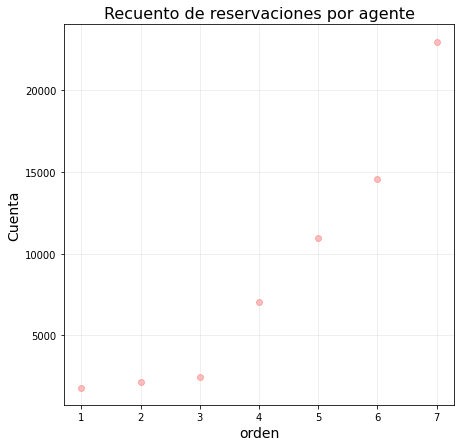

In [16]:
#Reemplazar etiquetas
hoteles.loc[~hoteles['agent'].isin([7, 250, 14, -1, 240, 9]), 'agent'] = 0

#Se obtiene el recuento de reservaciones por country
books_by_agent = hoteles.groupby(by='agent').count()[['hotel']]
cuantiles = cuantiles_df(books_by_agent, 'hotel')

#Tamaño de la figura
plt.figure(figsize=(7,7))

#Graficando para X1
plt.scatter(x=cuantiles['orden'], y=cuantiles['hotel'], c='red', alpha=0.25)

#Styling
plt.title('Recuento de reservaciones por agente', fontsize=16)
plt.xlabel('orden', fontsize=14)
plt.ylabel('Cuenta', fontsize=14)
plt.grid(alpha=0.25)

Recuento de reservaciones con niños agrupado por agente

In [17]:
crosstab = hoteles[['children','agent']].pivot_table(index='agent', columns='children', aggfunc=lambda x: len(x))
crosstab

children,children,none
agent,,
-1.0,593,10347
0.0,926,22059
7.0,245,2231
9.0,1481,13071
14.0,325,1841
240.0,748,6297
250.0,307,1498


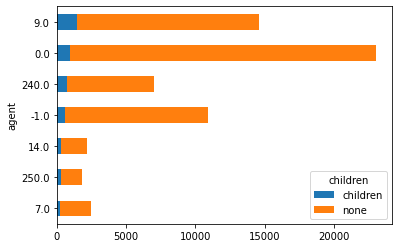

In [18]:
ax = crosstab.sort_values(by='children').plot.barh(rot=0, stacked=True)

## Company

In [23]:
hoteles.loc[hoteles['company'] != -1]['children'].value_counts()

none        4895
children      68
Name: children, dtype: int64

Se descarta variable `company`

## Mes de inicio de vacaciones

Recuento de reservaciones con niños agrupado por mes

In [36]:
crosstab = hoteles[['children','arrival_month']].pivot_table(index='arrival_month', columns='children', aggfunc=lambda x: len(x))
crosstab

children,children,none
arrival_month,,
April,490,6075
August,862,4667
December,381,4028
February,435,4937
January,240,3882
July,647,3943
June,209,2987
March,349,6296
May,191,3372


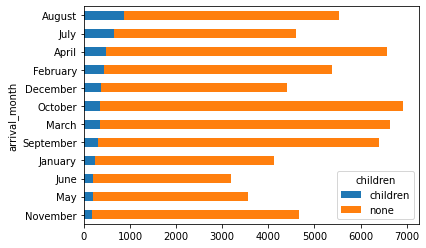

In [37]:
ax = crosstab.sort_values(by='children').plot.barh(rot=0, stacked=True)

**Proporcionalmente**

In [38]:
df = hoteles[['children','arrival_month']].pivot_table(index='arrival_month', columns='children', aggfunc=lambda x: len(x), margins=True)
df.loc[:, 'children':'none'] = df.loc[:, 'children':'none'].div(df['All'], axis=0)
df

children,children,none,All
arrival_month,,,
April,0.074638,0.925362,6565
August,0.155905,0.844095,5529
December,0.086414,0.913586,4409
February,0.080975,0.919025,5372
January,0.058224,0.941776,4122
July,0.140959,0.859041,4590
June,0.065394,0.934606,3196
March,0.052521,0.947479,6645
May,0.053607,0.946393,3563


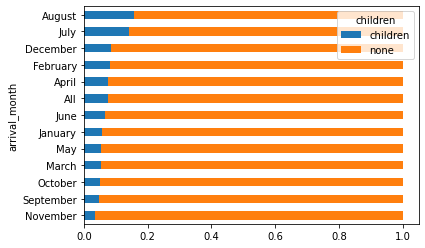

In [39]:
ax = df[['children', 'none']].sort_values(by='children').plot.barh(rot=0, stacked=True)

## Día de inicio de vacaciones

Recuento de reservaciones con niños agrupado por día

In [40]:
crosstab = hoteles[['children','arrival_day']].pivot_table(index='arrival_day', columns='children', aggfunc=lambda x: len(x))
crosstab

children,children,none
arrival_day,,
Friday,744,9129
Monday,689,9161
Saturday,905,8186
Sunday,642,7098
Thursday,641,8614
Tuesday,522,7026
Wednesday,482,8130


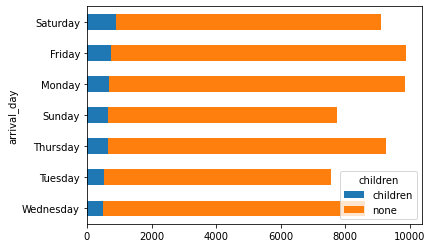

In [41]:
ax = crosstab.sort_values(by='children').plot.barh(rot=0, stacked=True)

**Proporcionalmente**

In [42]:
df = hoteles[['children','arrival_day']].pivot_table(index='arrival_day', columns='children', aggfunc=lambda x: len(x), margins=True)
df.loc[:, 'children':'none'] = df.loc[:, 'children':'none'].div(df['All'], axis=0)
df

children,children,none,All
arrival_day,,,
Friday,0.075357,0.924643,9873
Monday,0.069949,0.930051,9850
Saturday,0.099549,0.900451,9091
Sunday,0.082946,0.917054,7740
Thursday,0.069260,0.930740,9255
Tuesday,0.069157,0.930843,7548
Wednesday,0.055968,0.944032,8612
All,0.074634,0.925366,61969


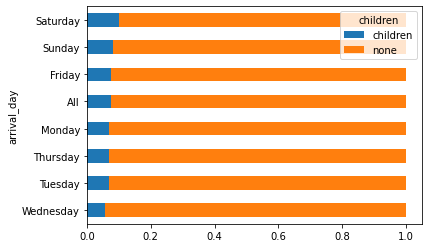

In [43]:
ax = df[['children', 'none']].sort_values(by='children').plot.barh(rot=0, stacked=True)

## Tipo de cuarto reservado

Recuento de reservaciones con niños agrupado por tipo de cuarto reservado

In [44]:
crosstab = hoteles[['children','reserved_room_type']].pivot_table(index='reserved_room_type', columns='children', aggfunc=lambda x: len(x))
crosstab

children,children,none
reserved_room_type,,
A,1761.0,42330.0
B,186.0,501.0
C,286.0,133.0
D,505.0,9654.0
E,288.0,3376.0
F,740.0,860.0
G,643.0,415.0
H,216.0,71.0
L,NaN,4.0


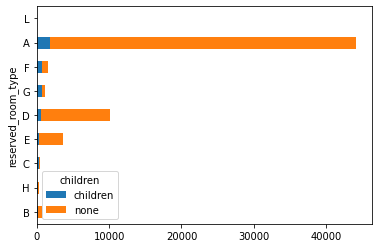

In [45]:
ax = crosstab.sort_values(by='children').plot.barh(rot=0, stacked=True)

**Proporcionalmente**

In [46]:
df = hoteles[['children','reserved_room_type']].pivot_table(index='reserved_room_type', columns='children', aggfunc=lambda x: len(x), margins=True)
df.loc[:, 'children':'none'] = df.loc[:, 'children':'none'].div(df['All'], axis=0)
df

children,children,none,All
reserved_room_type,,,
A,0.039940,0.960060,44091
B,0.270742,0.729258,687
C,0.682578,0.317422,419
D,0.049710,0.950290,10159
E,0.078603,0.921397,3664
F,0.462500,0.537500,1600
G,0.607750,0.392250,1058
H,0.752613,0.247387,287
L,NaN,1.000000,4


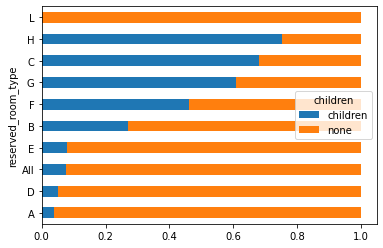

In [47]:
ax = df[['children', 'none']].sort_values(by='children').plot.barh(rot=0, stacked=True)

Los cuartos F y G son candidatos potenciales

## Tipo de comida

Recuento de reservaciones con niños agrupado por tipo de comida

In [48]:
crosstab = hoteles[['children','meal']].pivot_table(index='meal', columns='children', aggfunc=lambda x: len(x))
crosstab

children,children,none
meal,,
BB,3790,44565
FB,48,228
HB,631,6938
SC,125,4796
Undefined,31,817


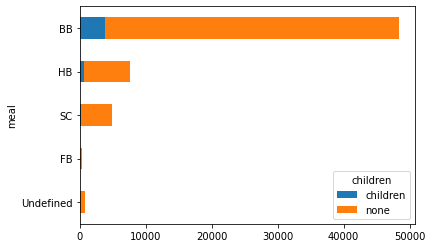

In [49]:
ax = crosstab.sort_values(by='children').plot.barh(rot=0, stacked=True)

**Proporcionalmente**

In [51]:
df = hoteles[['children','meal']].pivot_table(index='meal', columns='children', aggfunc=lambda x: len(x), margins=True)
df.loc[:, 'children':'none'] = df.loc[:, 'children':'none'].div(df['All'], axis=0)
df

children,children,none,All
meal,,,
BB,0.078379,0.921621,48355
FB,0.173913,0.826087,276
HB,0.083366,0.916634,7569
SC,0.025401,0.974599,4921
Undefined,0.036557,0.963443,848
All,0.074634,0.925366,61969


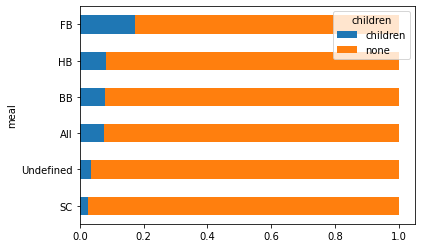

In [52]:
ax = df[['children', 'none']].sort_values(by='children').plot.barh(rot=0, stacked=True)

Se descarta

## Segmento de mercado

Recuento de reservaciones con niños agrupado por tipo de segmento

In [53]:
crosstab = hoteles[['children','market_segment']].pivot_table(index='market_segment', columns='children', aggfunc=lambda x: len(x))
crosstab

children,children,none
market_segment,,
Aviation,NaN,128.0
Complementary,42.0,515.0
Corporate,41.0,3822.0
Direct,1103.0,7559.0
Groups,46.0,6914.0
Offline_TA/TO,491.0,13070.0
Online_TA,2902.0,25336.0


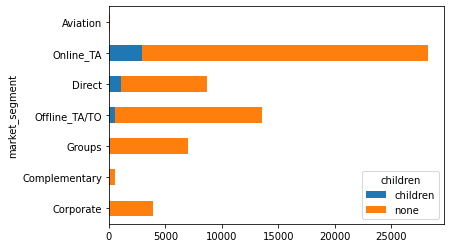

In [54]:
ax = crosstab.sort_values(by='children').plot.barh(rot=0, stacked=True)

**Proporcionalmente**

In [55]:
df = hoteles[['children','market_segment']].pivot_table(index='market_segment', columns='children', aggfunc=lambda x: len(x), margins=True)
df.loc[:, 'children':'none'] = df.loc[:, 'children':'none'].div(df['All'], axis=0)
df

children,children,none,All
market_segment,,,
Aviation,NaN,1.000000,128
Complementary,0.075404,0.924596,557
Corporate,0.010614,0.989386,3863
Direct,0.127338,0.872662,8662
Groups,0.006609,0.993391,6960
Offline_TA/TO,0.036207,0.963793,13561
Online_TA,0.102769,0.897231,28238
All,0.074634,0.925366,61969


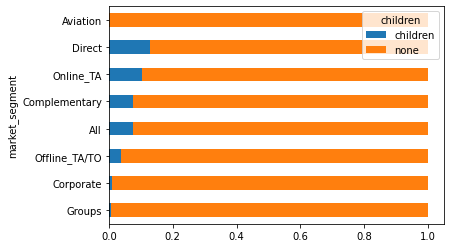

In [56]:
ax = df[['children', 'none']].sort_values(by='children').plot.barh(rot=0, stacked=True)

## Canal de distribución

Recuento de reservaciones con niños agrupado por tipo de segmento

In [57]:
crosstab = hoteles[['children','distribution_channel']].pivot_table(index='distribution_channel', columns='children', aggfunc=lambda x: len(x))
crosstab

children,children,none
distribution_channel,,
Corporate,49.0,4619.0
Direct,1148.0,8831.0
GDS,NaN,125.0
TA/TO,3427.0,43769.0
Undefined,1.0,NaN


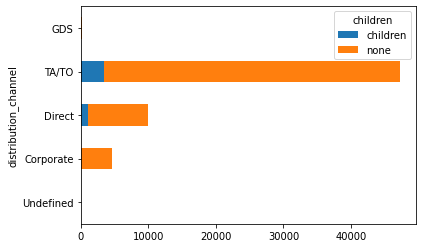

In [58]:
ax = crosstab.sort_values(by='children').plot.barh(rot=0, stacked=True)

**Proporcionalmente**

In [60]:
df = hoteles[['children','distribution_channel']].pivot_table(index='distribution_channel', columns='children', aggfunc=lambda x: len(x), margins=True)
df.loc[:, 'children':'none'] = df.loc[:, 'children':'none'].div(df['All'], axis=0)
df

children,children,none,All
distribution_channel,,,
Corporate,0.010497,0.989503,4668
Direct,0.115042,0.884958,9979
GDS,NaN,1.000000,125
TA/TO,0.072612,0.927388,47196
Undefined,1.000000,NaN,1
All,0.074634,0.925366,61969


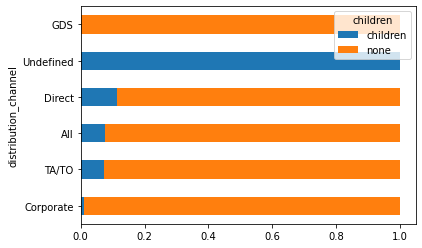

In [61]:
ax = df[['children', 'none']].sort_values(by='children').plot.barh(rot=0, stacked=True)

Se descarta

## Tipo de cliente

Recuento de reservaciones con niños agrupado por tipo de tipo de cliente

In [62]:
crosstab = hoteles[['children','customer_type']].pivot_table(index='customer_type', columns='children', aggfunc=lambda x: len(x))
crosstab

children,children,none
customer_type,,
Contract,143,2238
Group,22,395
Transient,4036,38714
Transient-Party,424,15997


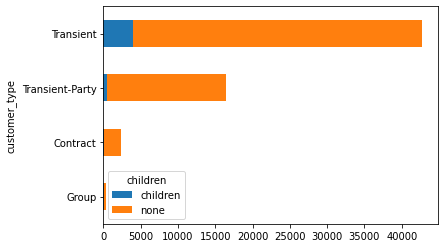

In [63]:
ax = crosstab.sort_values(by='children').plot.barh(rot=0, stacked=True)

**Proporcionalmente**

In [64]:
df = hoteles[['children','customer_type']].pivot_table(index='customer_type', columns='children', aggfunc=lambda x: len(x), margins=True)
df.loc[:, 'children':'none'] = df.loc[:, 'children':'none'].div(df['All'], axis=0)
df

children,children,none,All
customer_type,,,
Contract,0.060059,0.939941,2381
Group,0.052758,0.947242,417
Transient,0.094409,0.905591,42750
Transient-Party,0.025821,0.974179,16421
All,0.074634,0.925366,61969


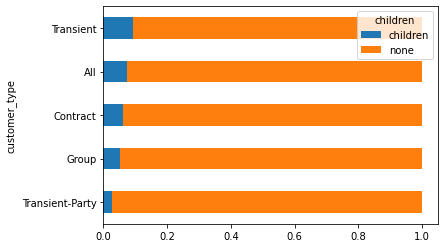

In [65]:
ax = df[['children', 'none']].sort_values(by='children').plot.barh(rot=0, stacked=True)

Se descarta

## Espacio para autos

Recuento de reservaciones con niños agrupado por tipo de tipo de espacio para autos

In [66]:
crosstab = hoteles[['children','required_car_parking_spaces']].pivot_table(index='required_car_parking_spaces', columns='children', aggfunc=lambda x: len(x))
crosstab

children,children,none
required_car_parking_spaces,,
none,3749,51949
parking,876,5395


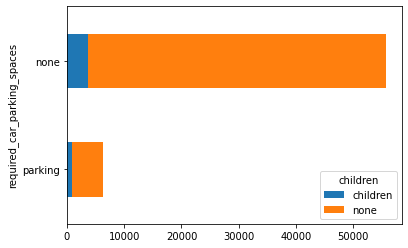

In [67]:
ax = crosstab.sort_values(by='children').plot.barh(rot=0, stacked=True)

**Proporcionalmente**

In [68]:
df = hoteles[['children','required_car_parking_spaces']].pivot_table(index='required_car_parking_spaces', columns='children', aggfunc=lambda x: len(x), margins=True)
df.loc[:, 'children':'none'] = df.loc[:, 'children':'none'].div(df['All'], axis=0)
df

children,children,none,All
required_car_parking_spaces,,,
none,0.067309,0.932691,55698
parking,0.139691,0.860309,6271
All,0.074634,0.925366,61969


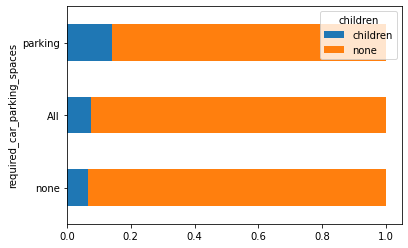

In [69]:
ax = df[['children', 'none']].sort_values(by='children').plot.barh(rot=0, stacked=True)

In [83]:
hoteles['total_of_special_requests'].value_counts()

0    31751
1    20657
2     7872
3     1474
4      189
5       26
Name: total_of_special_requests, dtype: int64